# Contents
Import Library
Rename Columns
Remove Columns
Create Regions
Spender Flag
Exlusion Flag
Income Flag
Age Flag
Add Department column according to Department ID
Add Household Status Flag
Aggregates for each Flag
Graphs for each flag
Export Graphs

In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#import data set
path = r'C:\Users\justi\Instacart Basket Analysis 12-22'
df = pd.read_pickle(os.path.join(path, '02 Data', '02 Prepared Data', 'merged4_9.pkl'))

In [3]:
df.shape

(32404859, 30)

In [4]:
df.dtypes

order_id                      int64
user_id                       int64
eval_set                     object
order_number                  int64
order_dow                     int64
order_hour_of_day             int64
days_since_prior_order      float64
product_id                    int64
add_to_cart_order             int64
reordered                     int64
product_name                 object
aisle_id                      int64
department_id                 int64
prices                      float64
_merge                     category
max_order                     int64
loyalty_flag                 object
average_spent_per_order     float64
spender_flag                 object
median_dspo                 float64
frequency_flag               object
first_name                   object
last_name                    object
gender                       object
state                        object
age                           int64
date_joined                  object
n_dependants                

In [5]:
#rename and delete columns
df.rename(columns = {'order_dow': 'order_day_of_week'}, inplace = True)
df.rename(columns = {'median_dspo': 'median_days_since_prior_order'}, inplace = True)

In [6]:
#Not useful Data for analysis
df.pop('eval_set')
df.pop('_merge')

0           both
1           both
2           both
3           both
4           both
            ... 
32404854    both
32404855    both
32404856    both
32404857    both
32404858    both
Name: _merge, Length: 32404859, dtype: category
Categories (3, object): ['left_only', 'right_only', 'both']

In [7]:
#Remove PII
df.pop('first_name')
df.pop('last_name')

0              Nguyen
1              Nguyen
2              Nguyen
3              Nguyen
4              Nguyen
              ...    
32404854      Manning
32404855      Manning
32404856        Hines
32404857        Hines
32404858    Carpenter
Name: last_name, Length: 32404859, dtype: object

In [8]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'max_order', 'loyalty_flag',
       'average_spent_per_order', 'spender_flag',
       'median_days_since_prior_order', 'frequency_flag', 'gender', 'state',
       'age', 'date_joined', 'n_dependants', 'fam_status', 'income'],
      dtype='object')

In [9]:
#Create Regions
region_ne = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
region_mw = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
region_s = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
region_w = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']
df.loc[df['state'].isin(region_ne), 'region'] = 'Northeast'
df.loc[df['state'].isin(region_mw), 'region'] = 'Midwest'
df.loc[df['state'].isin(region_s), 'region'] = 'South'
df.loc[df['state'].isin(region_w), 'region'] = 'West'

In [10]:
#Difference between spending habits and different regions
spending_habits = pd.crosstab(df['spender_flag'], df['region'], dropna = False)
spending_habits

region,Midwest,Northeast,South,West
spender_flag,,,,
High Spender,155975,108225,209691,160354
Low Spender,7441350,5614511,10582194,8132559


In [11]:
#Q4 Create exclusion flag
df.loc[df['max_order'] >= 5, 'activity_flag'] = 'High Activity'
df.loc[df['max_order'] < 5, 'activity_flag'] = 'Low Activity'
df['activity_flag'].value_counts(dropna = False)

High Activity    30964564
Low Activity      1440295
Name: activity_flag, dtype: int64

In [12]:
#exclude low Activity customers
high_activity_df = df[df.activity_flag != 'Low Activity']

In [13]:
high_activity_df.activity_flag.value_counts()

High Activity    30964564
Name: activity_flag, dtype: int64

In [14]:
high_activity_df.to_pickle(os.path.join(path, '02 Data', '02 Prepared Data', 'high_activity_df.pkl'))

In [15]:
#Q5 Create profile variables

In [16]:
#Profile based on income
df['income'].describe()

count    3.240486e+07
mean     9.943773e+04
std      4.305727e+04
min      2.590300e+04
25%      6.700400e+04
50%      9.661800e+04
75%      1.279120e+05
max      5.939010e+05
Name: income, dtype: float64

In [17]:
df.loc[(df['income'] >= 0) & (df['income'] < 30000), 'income_category'] = 'lowest'
df.loc[(df['income'] >= 30000) & (df['income'] < 50000), 'income_category'] = 'lower_middle'
df.loc[(df['income'] >= 50000) & (df['income'] < 100000), 'income_category'] = 'middle'
df.loc[(df['income'] >= 100000) & (df['income'] < 350000), 'income_category'] = 'upper_middle'
df.loc[df['income'] >= 350000, 'income_category'] = 'Rich'

In [18]:
df.income_category.value_counts()

upper_middle    14740409
middle          13996010
lower_middle     3386996
lowest            207087
Rich               74357
Name: income_category, dtype: int64

In [19]:
df['age'].describe()

count    3.240486e+07
mean     4.946527e+01
std      1.848558e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

In [20]:
#profile based on age
df.loc[(df['age'] >= 18) & (df['age'] < 24), 'age_category'] = 'college_age_adult'
df.loc[(df['age'] >= 24) & (df['age'] < 35), 'age_category'] = 'young_adult'
df.loc[(df['age'] >= 35) & (df['age'] < 50), 'age_category'] = 'middle_age_adult'
df.loc[(df['age'] >= 50) & (df['age'] < 65), 'age_category'] = 'Senior Middle Age'
df.loc[df['age'] >= 65, 'age_category'] = 'Senior'

In [21]:
df.age_category.value_counts()

Senior               8575084
middle_age_adult     7645774
Senior Middle Age    7556346
young_adult          5563716
college_age_adult    3063939
Name: age_category, dtype: int64

In [22]:
#profile based on department_id
dep_dictionary = {1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}
df['department'] = df['department_id'].map(dep_dictionary)

In [23]:
df.department.value_counts()

produce            9479291
dairy eggs         5398747
snacks             2887550
beverages          2688123
frozen             2234743
pantry             1875369
bakery             1172428
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
meat seafood        708927
breakfast           703033
personal care       447572
babies              423802
international       269253
alcohol             153696
pets                 97716
missing              69145
other                36291
bulk                 34573
Name: department, dtype: int64

In [24]:
#profile based on number of dependents
df.loc[df['n_dependants'] <= 0, 'household_status'] = 'No Dependents'
df.loc[df['n_dependants'] > 0, 'household_status'] = 'Has Dependents'

In [25]:
df.household_status.value_counts()

Has Dependents    24307356
No Dependents      8097503
Name: household_status, dtype: int64

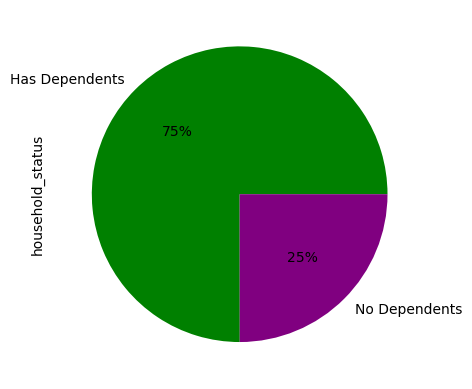

In [26]:
#pie chart of household status
household_status_pie = df['household_status'].value_counts().plot.pie(labels=['Has Dependents', 'No Dependents'], autopct=('%1.f%%'), colors=['green', 'purple'])

In [62]:
household_status_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'household_status_pie.png'))

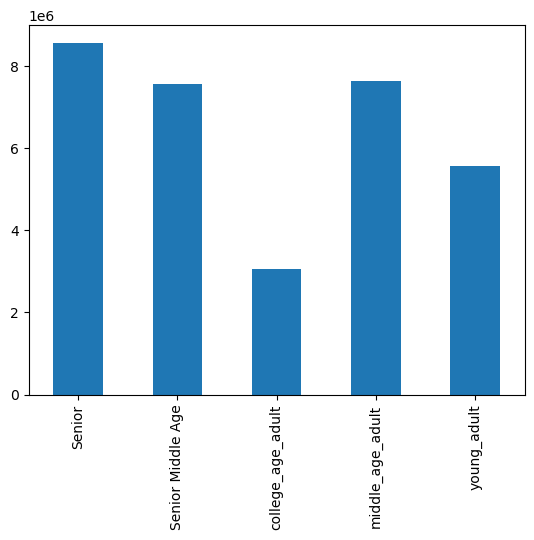

In [27]:
age_category_bar = df['age_category'].value_counts().sort_index().plot.bar()

In [63]:
age_category_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_category_bar.png'))

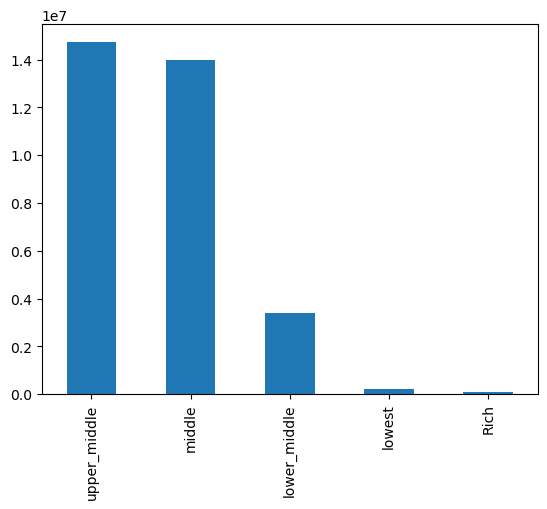

In [28]:
income_category_bar = df['income_category'].value_counts().plot.bar()

In [64]:
income_category_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_category_bar.png'))

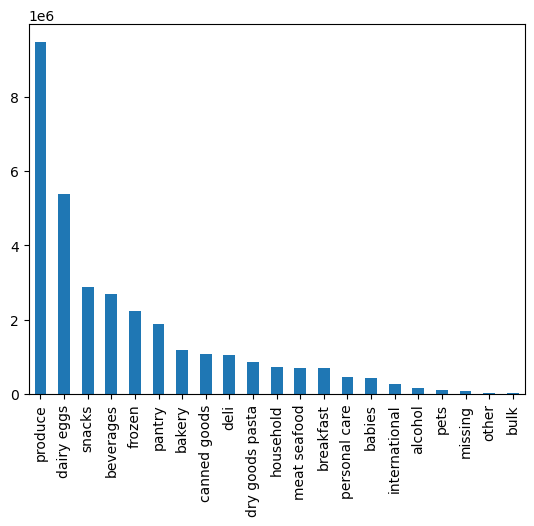

In [29]:
departments_bar = df['department'].value_counts().plot.bar()

In [65]:
departments_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'departments_bar.png'))

In [30]:
#Max, min, mean for profiles for usage frequency and expenditure
household_status_usage_agg = df.groupby('household_status').agg({'days_since_prior_order':['mean', 'min','max']})
household_status_usage_agg

days_since_prior_order           
                                   mean  min   max
household_status                                  
Has Dependents                11.111834  0.0  30.0
No Dependents                 11.080805  0.0  30.0

In [31]:
age_usage_category_agg = df.groupby('age_category').agg({'days_since_prior_order':['mean', 'min','max']})
age_usage_category_agg

days_since_prior_order           
                                    mean  min   max
age_category                                       
Senior                         11.078641  0.0  30.0
Senior Middle Age              11.131707  0.0  30.0
college_age_adult              11.030165  0.0  30.0
middle_age_adult               11.086507  0.0  30.0
young_adult                    11.170663  0.0  30.0

In [32]:
income_usage_category_agg = df.groupby('income_category').agg({'days_since_prior_order':['mean', 'min','max']})
income_usage_category_agg

days_since_prior_order           
                                  mean  min   max
income_category                                  
Rich                         10.316866  0.0  30.0
lower_middle                 11.563846  0.0  30.0
lowest                       11.970702  0.0  30.0
middle                       11.049326  0.0  30.0
upper_middle                 11.043553  0.0  30.0

In [33]:
dep_usage_category_agg = df.groupby('department').agg({'days_since_prior_order':['mean', 'min','max']})
dep_usage_category_agg

days_since_prior_order           
                                  mean  min   max
department                                       
alcohol                      10.340887  0.0  30.0
babies                       10.004465  0.0  30.0
bakery                       11.097613  0.0  30.0
beverages                    11.053389  0.0  30.0
breakfast                    11.296101  0.0  30.0
bulk                         10.104230  0.0  30.0
canned goods                 11.656079  0.0  30.0
dairy eggs                   10.986054  0.0  30.0
deli                         11.345655  0.0  30.0
dry goods pasta              11.774450  0.0  30.0
frozen                       11.730829  0.0  30.0
household                    11.996490  0.0  30.0
international                11.291251  0.0  30.0
meat seafood                 11.432021  0.0  30.0
missing                      10.218559  0.0  30.0
other                        10.952867  0.0  30.0
pantry                       11.163256  0.0  30.0
personal care                11.593145  0.0  30.0
pets                         11.867322  0.0  30.0
produce                      10.856212  0.0  30.0
snacks                       10.947879  0.0  30.0

In [34]:
household_status_exp_agg = df.groupby('household_status').agg({'prices':['mean', 'min','max']})
household_status_exp_agg

prices              
                       mean  min      max
household_status                         
Has Dependents    11.930584  1.0  99999.0
No Dependents     12.129243  1.0  99999.0

In [35]:
dep_exp_category_agg = df.groupby('department').agg({'prices':['mean', 'min','max']})
dep_exp_category_agg

prices              
                      mean  min      max
department                              
alcohol           8.143701  1.0     15.0
babies            7.638380  1.0     15.0
bakery            7.853809  1.0     15.0
beverages         7.680502  1.0     15.0
breakfast         8.028963  1.0     14.9
bulk              8.348960  1.4     14.1
canned goods      7.539976  1.0     15.0
dairy eggs       33.479533  1.0  99999.0
deli              7.778701  1.0     15.0
dry goods pasta   7.350283  1.0     15.0
frozen            7.736553  1.0     15.0
household         7.384058  1.0     15.0
international     7.682264  1.0     15.0
meat seafood     16.294443  8.0     25.0
missing           8.660716  1.0     15.0
other             6.990934  1.1     15.0
pantry            8.009443  1.0     20.0
personal care     7.996769  1.0     15.0
pets              7.889070  1.0     15.0
produce           7.981708  1.0     15.0
snacks            4.275437  1.6      7.0

In [36]:
income_exp_category_agg = df.groupby('income_category').agg({'prices':['mean', 'min','max']})
income_exp_category_agg

prices              
                       mean  min      max
income_category                          
Rich             289.772056  1.0  99999.0
lower_middle       6.707515  1.0     25.0
lowest             6.524778  1.0     25.0
middle             8.468613  1.0  99999.0
upper_middle      15.201384  1.0  99999.0

In [37]:
age_exp_category_agg = df.groupby('age_category').agg({'prices':['mean', 'min','max']})
age_exp_category_agg

prices              
                        mean  min      max
age_category                              
Senior             11.768850  1.0  99999.0
Senior Middle Age  11.823702  1.0  99999.0
college_age_adult  12.225207  1.0  99999.0
middle_age_adult   12.153358  1.0  99999.0
young_adult        12.145758  1.0  99999.0

In [38]:
#Q8 compare customer profiles with regions and departments
age_dep_crosstab = pd.crosstab(df['department'], df['age_category'])
age_dep_crosstab

age_category,Senior,Senior Middle Age,college_age_adult,middle_age_adult,young_adult
department,,,,,
alcohol,39036,35798,16320,36241,26301
babies,109445,98736,39819,104529,71273
bakery,309522,274153,110149,276001,202603
beverages,714832,633966,249915,631224,458186
breakfast,183844,164767,67975,165385,121062
bulk,9242,7748,3350,8281,5952
canned goods,282438,248898,100303,250831,185588
dairy eggs,1426213,1247458,512388,1279772,932916
deli,277618,245676,99035,248934,179986


In [39]:
#Conclusion: bulk products increase in popularity as an individuals age. 

In [40]:
age_region_crosstab = pd.crosstab(df['age_category'], df['region'])
age_region_crosstab

region,Midwest,Northeast,South,West
age_category,,,,
Senior,1990844,1553903,2836257,2194080
Senior Middle Age,1778290,1309271,2502881,1965904
college_age_adult,718340,545870,1040416,759313
middle_age_adult,1825619,1324020,2554422,1941713
young_adult,1284232,989672,1857909,1431903


In [41]:
#Conclusion: Instacart is most popular in the southern region amongst all age groups. The north east has the least number of customers in all age groups.

In [42]:
income_dep_crosstab = pd.crosstab(df['department'], df['income_category'])
income_dep_crosstab

income_category,Rich,lower_middle,lowest,middle,upper_middle
department,,,,,
alcohol,2399,18414,1394,61158,70331
babies,589,29189,1669,190605,201750
bakery,3454,108249,6460,508193,546072
beverages,7091,380814,24691,1109160,1166367
breakfast,1774,92201,5167,295032,308859
bulk,4,4548,341,14993,14687
canned goods,2808,81970,4682,471816,506782
dairy eggs,12527,504823,30256,2361601,2489540
deli,2019,107171,6925,455037,480097


In [43]:
#Conclusion: Very few rich and lowest income individauls buy in bulk. Individuals in different income categories purchase from different departments in instacart. 

In [44]:
income_region_crosstab = pd.crosstab(df['income_category'], df['region'])
income_region_crosstab

region,Midwest,Northeast,South,West
income_category,,,,
Rich,24093,11985,20457,17822
lower_middle,781982,591904,1149933,863177
lowest,56416,35352,69527,45792
middle,3218985,2467005,4706582,3603438
upper_middle,3515849,2616490,4845386,3762684


In [45]:
#Conclusion:
#The midwest has the most individuals who belong to the rich income category. The south has most of the lowest, low_middle class, middle, and upper middle customers. 

In [46]:
household_status_dep_crosstab = pd.crosstab(df['department'], df['household_status'])
household_status_dep_crosstab

household_status,Has Dependents,No Dependents
department,,
alcohol,114578,39118
babies,317308,106494
bakery,878023,294405
beverages,2013681,674442
breakfast,528456,174577
bulk,26295,8278
canned goods,803220,264838
dairy eggs,4049385,1349362
deli,786104,265145


In [47]:
df.household_status.value_counts()

Has Dependents    24307356
No Dependents      8097503
Name: household_status, dtype: int64

In [48]:
#conclusion: Suprisingly, a good amount of customers with no dependents buy from the baby and bulk department. 

In [49]:
household_status_region_crosstab = pd.crosstab(df['household_status'], df['region'])
household_status_region_crosstab

region,Midwest,Northeast,South,West
household_status,,,,
Has Dependents,5692125,4304435,8090226,6220570
No Dependents,1905200,1418301,2701659,2072343


In [50]:
#conclusion: The midwest, northeast, and west have a similar number of customers without dependents.

In [51]:
#Charts:

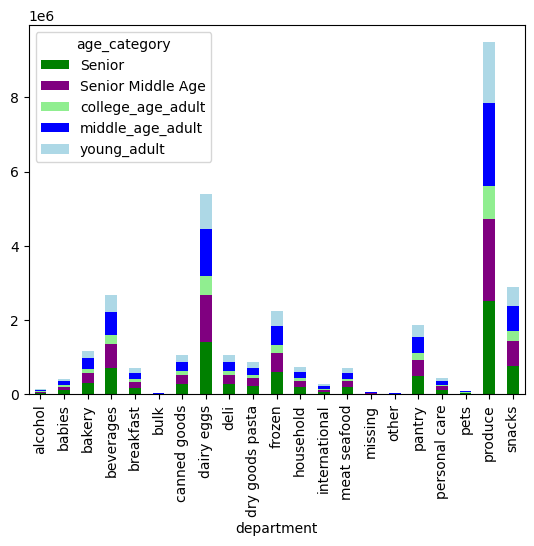

In [52]:
age_category_dep_chart = age_dep_crosstab.plot(kind = 'bar', stacked = True, color = ['green', 'purple', 'lightgreen', 'blue', 'lightblue'])

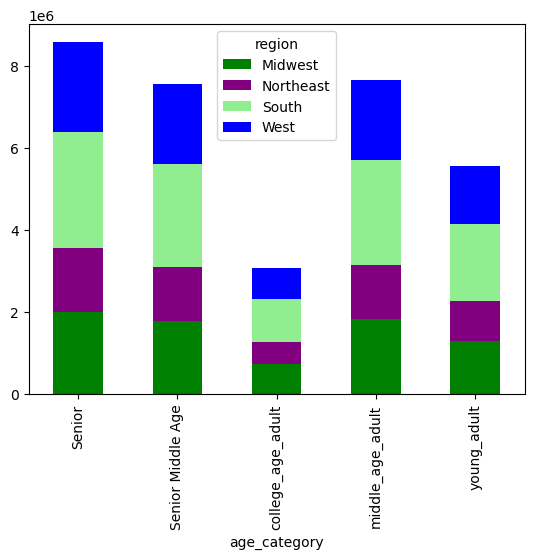

In [53]:
age_category_region_chart = age_region_crosstab.plot(kind = 'bar', stacked = True, color = ['green', 'purple', 'lightgreen', 'blue', 'lightblue'])

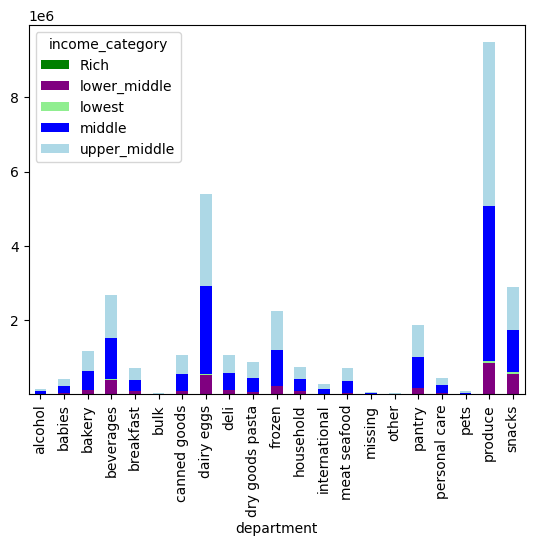

In [54]:
income_category_dep_chart = income_dep_crosstab.plot(kind = 'bar', stacked = True, color = ['green', 'purple', 'lightgreen', 'blue', 'lightblue'])

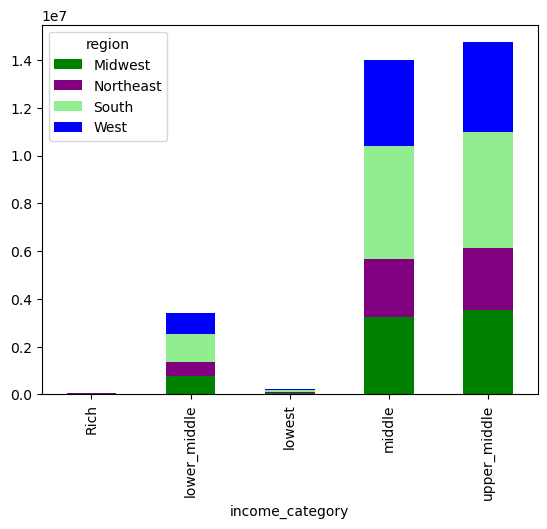

In [55]:
income_category_region_chart = income_region_crosstab.plot(kind = 'bar', stacked = True, color = ['green', 'purple', 'lightgreen', 'blue', 'lightblue'])

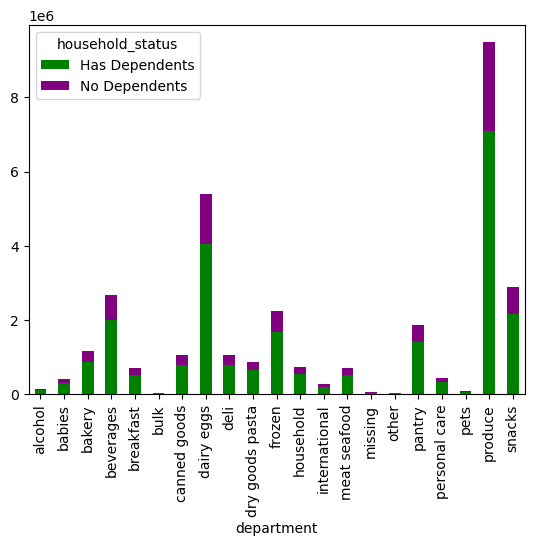

In [56]:
household_status_dep_chart = household_status_dep_crosstab.plot(kind = 'bar', stacked = True, color = ['green', 'purple', 'lightgreen', 'blue', 'lightblue'])

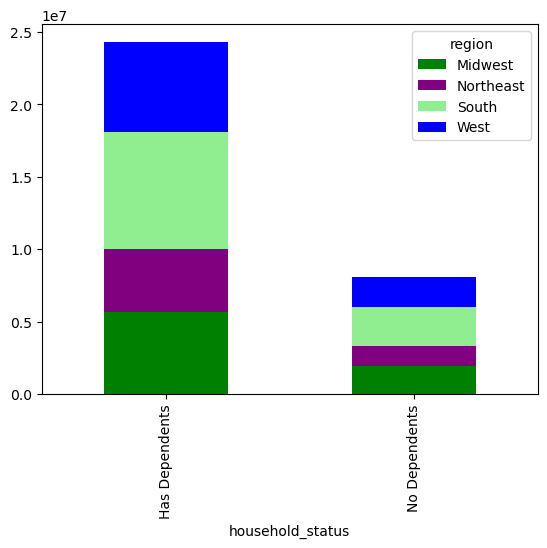

In [57]:
household_status_region_chart = household_status_region_crosstab.plot(kind = 'bar', stacked = True, color = ['green', 'purple', 'lightgreen', 'blue', 'lightblue'])

In [58]:
#Export Chart

In [59]:
age_category_dep_chart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_category_dep_chart.png'))
age_category_region_chart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_category_region_chart.png'))
income_category_dep_chart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_category_dep_chart.png'))
income_category_region_chart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_category_region_chart.png'))
household_status_dep_chart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'household_status_dep_chart.png'))
household_status_region_chart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'household_status_region_chart.png'))

In [60]:
df.shape

(32404859, 32)

In [61]:
#export data set
df.to_pickle(os.path.join(path, '02 Data', '02 Prepared Data', '4_10final.pkl'))